# Saving the model and improving 

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import classification_report
from statistics import mean
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score, accuracy_score

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

In [3]:
hp_oHe = pd.read_csv('HP_OHE_3class.csv')
hp_oHe.drop(hp_oHe.tail(17).index,inplace=True) 
hp_oHe = hp_oHe.drop('Unnamed: 0',axis=1)

hp_ME = pd.read_csv("harryPotterClean.csv")
hp_ME.drop(hp_ME.tail(17).index,inplace=True) 
hp_ME = hp_ME.drop('Unnamed: 0',axis=1)

hp_OE = pd.read_csv("harryPotterCleanOE.csv")
hp_OE.drop(hp_OE.tail(17).index,inplace=True) 
hp_OE = hp_OE.drop('Unnamed: 0',axis=1)

In [4]:
class Data:

    def getXandY(self, df):
        df.drop(df.tail(20).index,inplace=True) 
        x = df.drop(['HP_Forbidden_clean'],axis=1)
        y = df.HP_Forbidden_clean
        return(x,y)

    def trainTest(self, x,y):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True)
        return(X_train, X_test, y_train, y_test)

    #Function to perform oversampling
    def overSampling(self, X_train, y_train, y_test, method):
        X_train_os, y_train_os= method.fit_resample(X_train, y_train)
        # Check the number of records after over sampling
        #print(sorted(Counter(y_train_os).items())) 
        return(X_train_os, y_train_os)

smote = SMOTE(random_state=42)

In [5]:
# change the y class to [0-2]
a = hp_oHe.HP_Forbidden_clean.replace([1,2,3], [0,1,2])

#Create the final dataframe
df=pd.DataFrame(a)
hp2=hp_oHe.drop('HP_Forbidden_clean',axis=1)
hp_oHe=pd.concat([hp2, df], axis=1)
hp_oHe.HP_Forbidden_clean.unique()

array([1., 0., 2.])

In [6]:
#split our dataframe into X and Y
x,y = Data().getXandY(hp_oHe)
#split the dataFrame into test and train
X_train, X_test, y_train, y_test = Data().trainTest(x,y)
#Oversample the train dataset with SMOTE
X_train_os, y_train_os = Data().overSampling(X_train, y_train, y_test, smote)

In [8]:
# determine the number of input features
n_features = X_train_os.shape[1]

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

NameError: name 'history' is not defined

Different types of gradient descent

In [7]:
class MLP:

    def testGD(self,X_train_os, y_train_os,X_test, y_test, epoch, bs,LR,mom):
        # determine the number of input features
        n_features = X_train_os.shape[1]
        #define the NN architecture
        model = Sequential()
        model.add(Dense(n_features, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
        model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(15, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(3, activation='softmax'))
        #compile the model
        opt = SGD(lr=LR, momentum=mom)
        model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        # fit the model
        history = model.fit(X_train_os, y_train_os, epochs=epoch, batch_size=bs, verbose=0,
                            validation_data=(X_test, y_test))
        # evaluate the model
        loss, acc = model.evaluate(X_test, y_test, verbose=0)
        #print('Test Accuracy: %.3f ' % acc)
        # plot learning curves
        #pyplot.plot(history.history['accuracy'], label='train')
        #pyplot.plot(history.history['val_accuracy'], label='test')
        #pyplot.title('MLP with BatchSize: {}, LR: {} and Momentum:{}'.format(bs,LR,mom))
        #pyplot.show()

        return acc, model


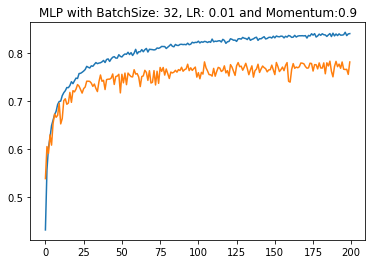

0.7813096046447754

In [13]:
MLP().testGD(X_train_os, y_train_os,X_test, y_test, 200, 32,0.01,0.9)

#### Repeat the process and save the model with the best accuracy

In [ ]:
import os
max_acc=0.2
rep = 20
model_version="0001"
model_name = "MLP_HP"
model_path = os.path.join(model_name, model_version)


for i in range(rep):
    accuracy, model = MLP().testGD(X_train_os, y_train_os,X_test, y_test, 200, 32,0.01,0.9)
    print("Accuracy is: {}".format(accuracy))
    if accuracy > max_acc:
        max_acc = accuracy
        model.save(model_path)
        tf.saved_model.save(model, model_path)
    print("The best accuracy so far is: {}".format(max_acc))
    print("-------------------------------------------------------")

Accuracy is: 0.7783428430557251
INFO:tensorflow:Assets written to: MLP_HP\0001\assets
INFO:tensorflow:Assets written to: MLP_HP\0001\assets
The best accuracy so far is: 0.7783428430557251
-------------------------------------------------------
Accuracy is: 0.7707141637802124
The best accuracy so far is: 0.7783428430557251
-------------------------------------------------------
Accuracy is: 0.7571519613265991
The best accuracy so far is: 0.7783428430557251
-------------------------------------------------------
Accuracy is: 0.790845513343811
INFO:tensorflow:Assets written to: MLP_HP\0001\assets
INFO:tensorflow:Assets written to: MLP_HP\0001\assets
The best accuracy so far is: 0.790845513343811
-------------------------------------------------------
Accuracy is: 0.7732570171356201
The best accuracy so far is: 0.790845513343811
-------------------------------------------------------
Accuracy is: 0.7751642465591431
The best accuracy so far is: 0.790845513343811
----------------------------

In [10]:
from tensorflow.keras.models import load_model

In [11]:
model = load_model('MLP_HP.h5')

In [32]:
test=[0.45,0.6,1,0.78,0.6,0,1,0,0.85,0.40,0.32,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]#X_test.iloc[8]
yhat=model.predict([test])
print("the prediction is: {}".format(yhat[0]))

1/1 [==============================] - 0s 25ms/step
the prediction is: [0.01168119 0.98716545 0.00115335]


## Dropout

In [41]:
from tensorflow.keras.layers import Dropout

class dropOut:
    
    def testMLP_1Drop(self,X_train_os, y_train_os,X_test, y_test, epoch, bs,LR,mom,drop):
        # determine the number of input features
        n_features = X_train_os.shape[1]
        #define the NN architecture
        model = Sequential()
        model.add(Dense(n_features, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
        model.add(Dropout(drop))
        model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(15, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(3, activation='softmax'))
        #compile the model
        opt = SGD(lr=LR, momentum=mom)
        model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        # fit the model
        history = model.fit(X_train_os, y_train_os, epochs=epoch, batch_size=bs, verbose=0,
                            validation_data=(X_test, y_test))
        # evaluate the model
        loss, acc = model.evaluate(X_test, y_test, verbose=0)
        #print('Test Accuracy: %.3f ' % acc)
        # plot learning curves
        pyplot.plot(history.history['accuracy'], label='train')
        pyplot.plot(history.history['val_accuracy'], label='test')
        pyplot.title('MLP with BatchSize: {}, LR: {}, Momentum:{} and dropout: {}'.format(bs,LR,mom,drop))
        pyplot.show()
        return acc, model

    def testMLP_AllDrop(self,X_train_os, y_train_os,X_test, y_test, epoch, bs,LR,mom,drop):
        # determine the number of input features
        n_features = X_train_os.shape[1]
        #define the NN architecture
        model = Sequential()
        model.add(Dense(n_features, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
        model.add(Dropout(drop))
        model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
        model.add(Dropout(drop))
        model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
        model.add(Dropout(drop))
        model.add(Dense(15, activation='relu', kernel_initializer='he_normal'))
        model.add(Dropout(drop))
        model.add(Dense(3, activation='softmax'))
        #compile the model
        opt = SGD(lr=LR, momentum=mom)
        model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        # fit the model
        history = model.fit(X_train_os, y_train_os, epochs=epoch, batch_size=bs, verbose=0,
                            validation_data=(X_test, y_test))
        # evaluate the model
        loss, acc = model.evaluate(X_test, y_test, verbose=0)
        #print('Test Accuracy: %.3f ' % acc)
        # plot learning curves
        pyplot.plot(history.history['accuracy'], label='train')
        pyplot.plot(history.history['val_accuracy'], label='test')
        pyplot.title('MLP with BatchSize: {}, LR: {}, Momentum:{} and dropout: {}'.format(bs,LR,mom,drop))
        pyplot.show()
        return acc, model

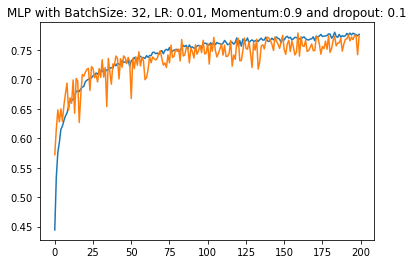

Accuracy is: 0.7738927602767944


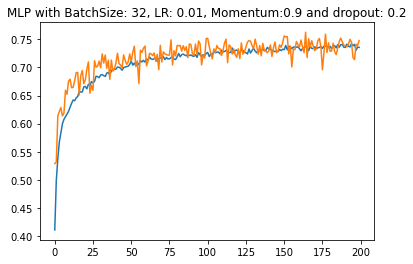

Accuracy is: 0.7476159930229187


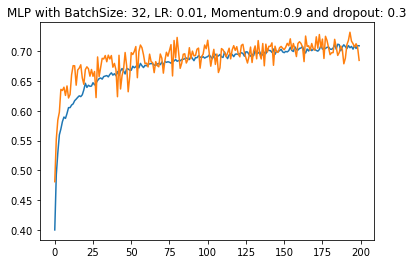

Accuracy is: 0.6842551231384277


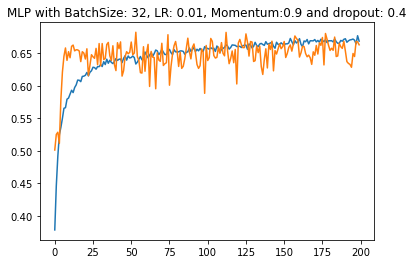

Accuracy is: 0.663064181804657


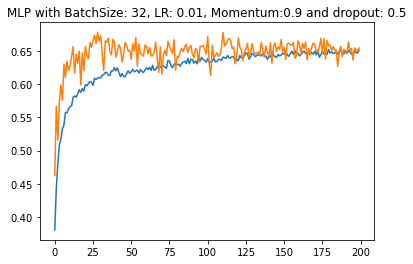

Accuracy is: 0.6541640162467957


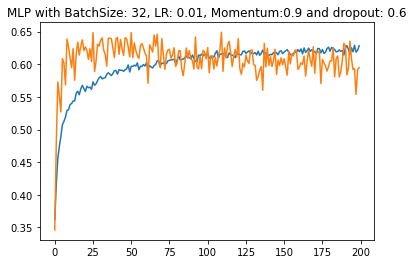

Accuracy is: 0.5950413346290588


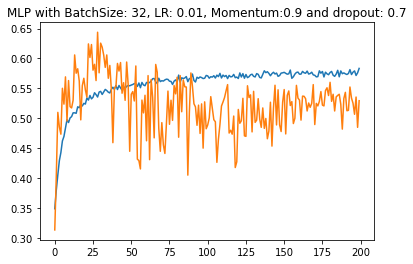

Accuracy is: 0.5293494462966919


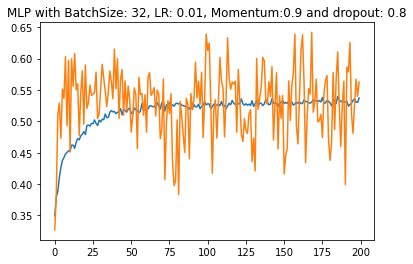

Accuracy is: 0.5628311038017273


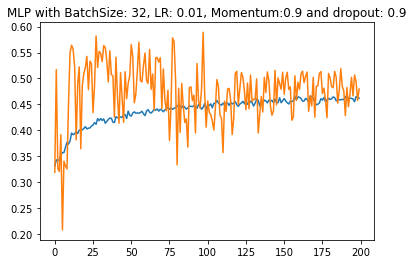

Accuracy is: 0.4795507490634918


In [40]:
drop = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in range(len(drop)):
    accuracy, model = dropOut().testMLP_1Drop(X_train_os, y_train_os,X_test, y_test, 200, 32,0.01,0.9,drop[i])
    print("Accuracy is: {}".format(accuracy))

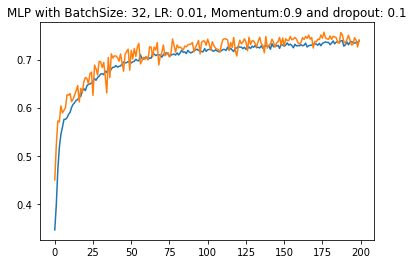

Accuracy is: 0.7406229972839355


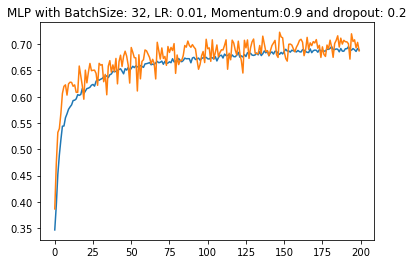

Accuracy is: 0.687221884727478


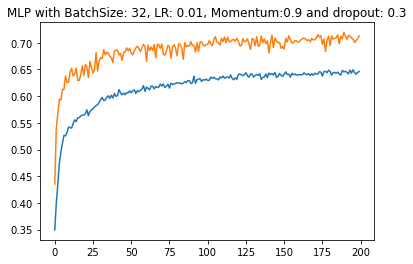

Accuracy is: 0.7128629088401794


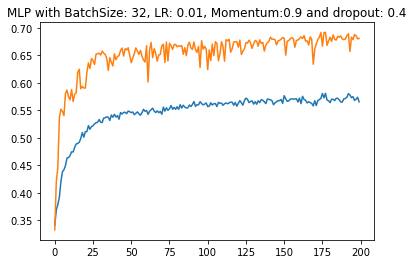

Accuracy is: 0.6810765266418457


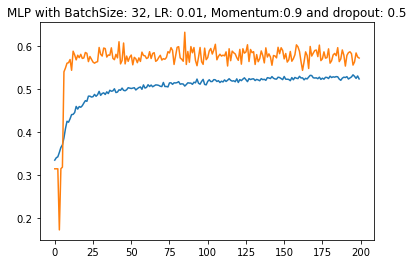

Accuracy is: 0.5725789070129395


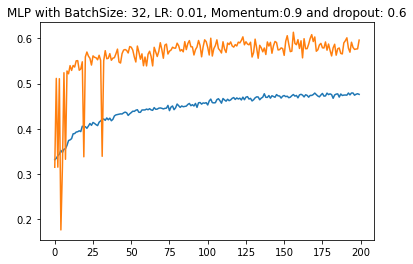

Accuracy is: 0.5958889722824097


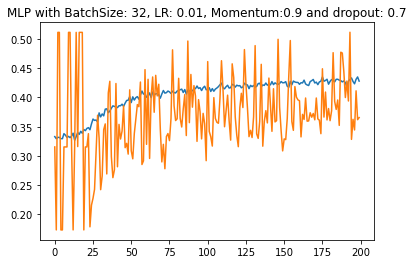

Accuracy is: 0.36554354429244995


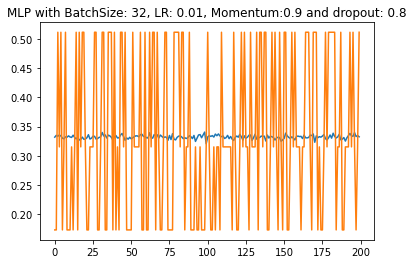

Accuracy is: 0.511337161064148


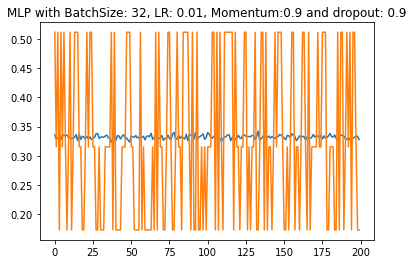

Accuracy is: 0.1733418107032776


In [42]:
for i in range(len(drop)):
    accuracy, model = dropOut().testMLP_AllDrop(X_train_os, y_train_os,X_test, y_test, 200, 32,0.01,0.9,drop[i])
    print("Accuracy is: {}".format(accuracy))

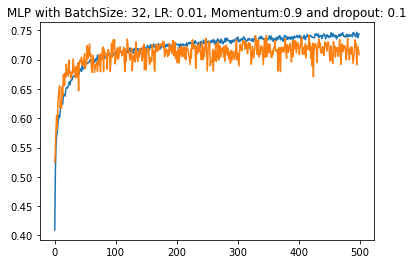

Accuracy is: 0.7086247205734253


In [43]:
accuracy, model = dropOut().testMLP_AllDrop(X_train_os, y_train_os,X_test, y_test, 500, 32,0.01,0.9,0.1)
print("Accuracy is: {}".format(accuracy))

## Batch Normalization

In [44]:
from tensorflow.keras.layers import BatchNormalization

class batchNorm:
    
    def test_MLP_BN(self,X_train_os, y_train_os,X_test, y_test, epoch, bs,LR,mom,drop):
        # determine the number of input features
        n_features = X_train_os.shape[1]
        #define the NN architecture
        model = Sequential()
        model.add(Dense(n_features, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
        model.add(Dropout(drop))
        model.add(BatchNormalization())
        model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(15, activation='relu', kernel_initializer='he_normal'))
        model.add(Dense(3, activation='softmax'))
        #compile the model
        opt = SGD(lr=LR, momentum=mom)
        model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        # fit the model
        history = model.fit(X_train_os, y_train_os, epochs=epoch, batch_size=bs, verbose=0,
                            validation_data=(X_test, y_test))
        # evaluate the model
        loss, acc = model.evaluate(X_test, y_test, verbose=0)
        #print('Test Accuracy: %.3f ' % acc)
        # plot learning curves
        pyplot.plot(history.history['accuracy'], label='train')
        pyplot.plot(history.history['val_accuracy'], label='test')
        pyplot.title('MLP with BatchSize: {}, LR: {}, Momentum:{} and dropout: {}'.format(bs,LR,mom,drop))
        pyplot.show()
        return acc, model


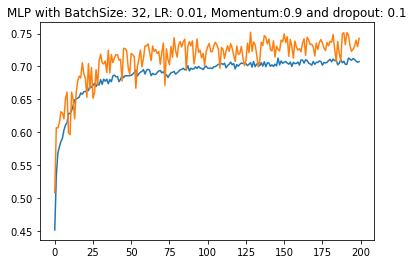

Accuracy is: 0.7429540157318115


In [46]:
accuracy, model = batchNorm().test_MLP_BN(X_train_os, y_train_os,X_test, y_test, 200, 32,0.01,0.9,0.1)
print("Accuracy is: {}".format(accuracy))